# Read All Data and Process it

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme='grade3')

In [422]:
apt_data = pd.read_csv('Ulsan_apart.csv', encoding='cp949') # 아파트 데이터
pop_data = pd.read_csv('Ulsan_population.csv', encoding='cp949') # 거주자 데이터
income_data = pd.read_csv('Ulsan_income_class.csv', encoding='cp949') # 추정소득분위 데이터
work_num_data = pd.read_csv('Ulsan_worker_num.csv', encoding='cp949') # 직장인 데이터

In [423]:
final_data = pd.DataFrame()

Function intersection_by_latlon : return the intersection data for having the same lat&lon 

In [424]:
def intersection_by_latlon(data1,data2):
    lat_list = data1['latitude'].apply(lambda x : x in list(data2['latitude']))
    lon_list = data1['longitude'].apply(lambda x : x in list(data2['longitude']))
    # reduce the data set (make the intersection to lat & long)
    data1 = data1.iloc[list(lat_list & lon_list)]
    data1 = data1.sort_values(by=['latitude','longitude'])
    return data1    

## Apart Data

In [425]:
len(apt_data)

1501

In [426]:
apt_data.head()

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,HO_CNT,PY_SUM,PR_SUM,PY_10U,PY_10,...,PR_05,PR_1,PR_2,PR_3,PR_4,PR_5,PR_6,PR_7_O,latitude,longitude
0,187,울산광역시,31,울주군,31710,90,2428.0,7.288000e+09,0,0,...,90,0,0,0,0,0,0,0,35.564456,129.115284
1,660,울산광역시,31,남구,31140,132,2391.0,1.384800e+10,0,132,...,20,112,0,0,0,0,0,0,35.540475,129.261636
2,661,울산광역시,31,남구,31140,48,1044.0,3.144000e+09,0,0,...,48,0,0,0,0,0,0,0,35.520104,129.312036
3,662,울산광역시,31,남구,31140,169,2594.0,8.026000e+09,0,139,...,39,0,0,0,0,0,0,0,35.521907,129.312065
4,663,울산광역시,31,남구,31140,495,10669.0,6.332900e+10,0,195,...,80,415,0,0,0,0,0,0,35.527182,129.324281


We can calculate average price per 1 PY (평당 가격 평균)

In [427]:
# 평당 가격 평균
apt_data['PR_per_PY'] = apt_data['PR_SUM'] / apt_data['PY_SUM']

In [428]:
apt_data.iloc[0]

Unnamed: 0            187
MEGA_NM             울산광역시
MEGA_CD                31
CTY_NM                울주군
CTY_CD              31710
HO_CNT                 90
PY_SUM               2428
PR_SUM          7.288e+09
PY_10U                  0
PY_10                   0
PY_20                  68
PY_30                  22
PY_40                   0
PY_50O                  0
PR_05U                  0
PR_05                  90
PR_1                    0
PR_2                    0
PR_3                    0
PR_4                    0
PR_5                    0
PR_6                    0
PR_7_O                  0
latitude          35.5645
longitude         129.115
PR_per_PY     3.00165e+06
Name: 0, dtype: object

In [429]:
price_apart = apt_data.sum().iloc[14:-3]
price_apart

PR_05U    34428
PR_05     84349
PR_1      67461
PR_2      16874
PR_3       4618
PR_4        724
PR_5        256
PR_6         96
PR_7_O       16
dtype: object

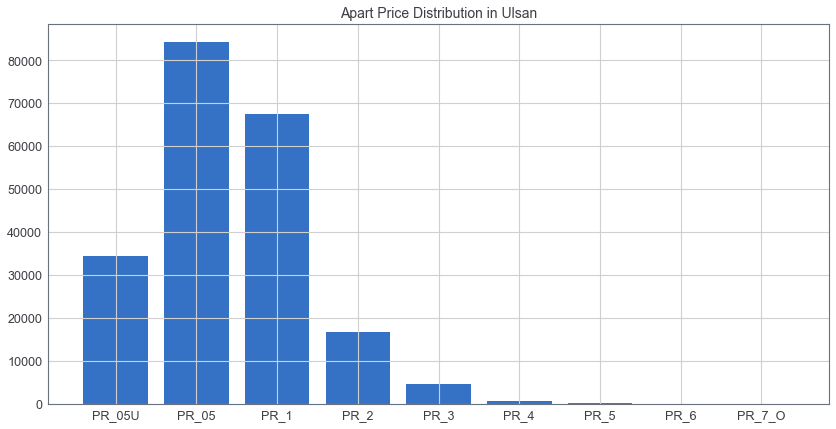

In [430]:
plt.figure(1, figsize=(14, 7))# control figure size
plt.bar(price_apart.index, price_apart)
plt.title('Apart Price Distribution in Ulsan', fontsize=14);
plt.show()

In [431]:
G = nx.Graph()

for idx,row in apt_data.iterrows():
    G.add_node(row['Unnamed: 0'],Label=idx,latitude=row['latitude'], longitude=row['longitude'],
              pr_05u=row['PR_05U'], pr_05=row['PR_05'], pr_1=row['PR_1'], pr_2=row['PR_2'], pr_3=row['PR_3'],pr_4=row['PR_4'],
              pr_5=row['PR_5'],pr_6=row['PR_6'],pr_7_Over=row['PR_7_O'],avg_price = row['PR_per_PY'])

In [432]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1501
Number of edges: 0
Average degree:   0.0000


In [433]:
nx.write_gexf(G,'apart.gexf')

In [434]:
apt_data.head()

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,HO_CNT,PY_SUM,PR_SUM,PY_10U,PY_10,...,PR_1,PR_2,PR_3,PR_4,PR_5,PR_6,PR_7_O,latitude,longitude,PR_per_PY
0,187,울산광역시,31,울주군,31710,90,2428.0,7.288000e+09,0,0,...,0,0,0,0,0,0,0,35.564456,129.115284,3.001647e+06
1,660,울산광역시,31,남구,31140,132,2391.0,1.384800e+10,0,132,...,112,0,0,0,0,0,0,35.540475,129.261636,5.791719e+06
2,661,울산광역시,31,남구,31140,48,1044.0,3.144000e+09,0,0,...,0,0,0,0,0,0,0,35.520104,129.312036,3.011494e+06
3,662,울산광역시,31,남구,31140,169,2594.0,8.026000e+09,0,139,...,0,0,0,0,0,0,0,35.521907,129.312065,3.094063e+06
4,663,울산광역시,31,남구,31140,495,10669.0,6.332900e+10,0,195,...,415,0,0,0,0,0,0,35.527182,129.324281,5.935795e+06


In [435]:
final_data = apt_data[['PR_per_PY','latitude','longitude']]
final_data = final_data.sort_values(by = ['latitude','longitude'])
final_data.head()

,PR_per_PY,latitude,longitude
466,1.879607e+06,35.380959,129.341694
981,1.759531e+06,35.380995,129.338393
894,2.439039e+06,35.383626,129.345041
288,2.506893e+06,35.400474,129.288071
295,2.483506e+06,35.401363,129.289186


In [436]:
len(final_data)

1501

## Population Data

In [437]:
print(len(pop_data), len(apt_data))

11766 1501


Here are more data point than apartment data set, we have to make the intersection by using the attribute longitude and latitude.

In [438]:
pop_data = intersection_by_latlon(pop_data, apt_data)
len(pop_data)

1471

In [439]:
final_data = intersection_by_latlon(final_data, pop_data)
len(final_data)

1471

In [440]:
pop_data.head()

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,HOUS,POP,POP_10,POP_20,POP_30,POP_40,POP_50,POP_60_O,longitude,latitude
11250,917168,울산광역시,31,울주군,31710,73.02,201.72,54.69,30.41,17.93,46.82,41.39,10.48,129.341694,35.380959
6332,511405,울산광역시,31,울주군,31710,73.00,207.86,51.70,27.64,28.05,36.32,41.78,22.37,129.338393,35.380995
5419,436106,울산광역시,31,울주군,31710,189.02,520.88,110.17,59.59,67.55,104.33,90.18,89.06,129.345041,35.383626
11340,925031,울산광역시,31,울주군,31710,53.50,132.29,48.13,14.87,55.63,12.46,0.54,0.66,129.288071,35.400474
11697,953620,울산광역시,31,울주군,31710,112.00,283.73,113.18,24.90,109.48,32.23,0.00,3.94,129.289186,35.401363


Check the whole distribution

In [441]:
pop_dist = pop_data.sum().iloc[7:-2]
pop_dist

POP_10       212895
POP_20        85873
POP_30       130148
POP_40       150898
POP_50      89450.1
POP_60_O    50941.8
dtype: object

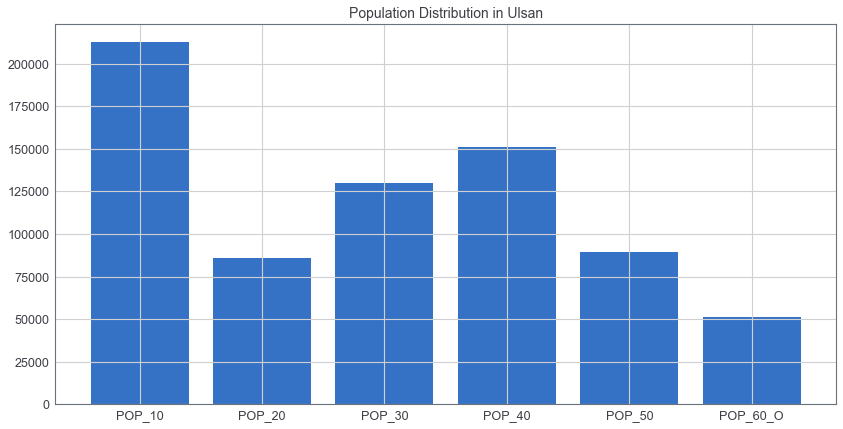

In [442]:
plt.figure(1, figsize=(14, 7))# control figure size
plt.bar(pop_dist.index, pop_dist)
plt.title('Population Distribution in Ulsan', fontsize=14);
plt.show()

### Calculating 'Starbucks Population Score' by using the statistics by age

<img src="https://trello-attachments.s3.amazonaws.com/59103d52b56a24582f00dc97/5aea7895f31341c182f4ba3d/28262f31d81a759274e8d84f9008ffe8/image.png"></img>

In [443]:
weight = np.array([0.0093,0.3,0.42,0.22,0.045])

In [444]:
# construct the 'POP_50_Over' attribute
pop_data['POP_50_O'] = pop_data['POP_50'] + pop_data['POP_60_O']

In [445]:
# Weighted average to get 'STARBUCKS SCORE'
pop_data['SB_score'] = pop_data[['POP_10', 'POP_20', 'POP_30', 'POP_40', 'POP_50_O']].apply(lambda x : np.matmul(x,weight), axis=1)

In [446]:
pop_data['SB_score'].sort_values(ascending=False).head(10)

2185     500.337817
3464     479.827467
1038     434.909750
6076     362.585691
1257     350.628772
4267     329.790936
5851     313.202125
11502    312.174958
2896     304.504913
5000     303.755094
Name: SB_score, dtype: float64

In [447]:
G = nx.Graph()

for idx,row in pop_data.iterrows():
    G.add_node(row['Unnamed: 0'],Label=idx,latitude=row['latitude'], longitude=row['longitude'],
              sb_score=row['SB_score'])

In [448]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1471
Number of edges: 0
Average degree:   0.0000


In [449]:
nx.write_gexf(G,'edited_population_score.gexf')

In [450]:
pop_data = pop_data.sort_values(by = ['latitude','longitude'])

In [451]:
pop_data.head()

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,HOUS,POP,POP_10,POP_20,POP_30,POP_40,POP_50,POP_60_O,longitude,latitude,POP_50_O,SB_score
11250,917168,울산광역시,31,울주군,31710,73.02,201.72,54.69,30.41,17.93,46.82,41.39,10.48,129.341694,35.380959,51.87,29.796767
6332,511405,울산광역시,31,울주군,31710,73.00,207.86,51.70,27.64,28.05,36.32,41.78,22.37,129.338393,35.380995,64.15,31.430960
5419,436106,울산광역시,31,울주군,31710,189.02,520.88,110.17,59.59,67.55,104.33,90.18,89.06,129.345041,35.383626,179.24,78.290981
11340,925031,울산광역시,31,울주군,31710,53.50,132.29,48.13,14.87,55.63,12.46,0.54,0.66,129.288071,35.400474,1.20,31.068409
11697,953620,울산광역시,31,울주군,31710,112.00,283.73,113.18,24.90,109.48,32.23,0.00,3.94,129.289186,35.401363,3.94,61.772074


In [452]:
final_data['SB_score'] = list(pop_data['SB_score'])
final_data.head()

,PR_per_PY,latitude,longitude,SB_score
466,1.879607e+06,35.380959,129.341694,29.796767
981,1.759531e+06,35.380995,129.338393,31.430960
894,2.439039e+06,35.383626,129.345041,78.290981
288,2.506893e+06,35.400474,129.288071,31.068409
295,2.483506e+06,35.401363,129.289186,61.772074


## Income Data

In [453]:
print(len(pop_data), len(income_data))

1471 11766


Here are more data point than previous data set, we have to make the intersection by using the attribute longitude and latitude.

In [454]:
income_data = intersection_by_latlon(income_data, pop_data)
print(len(income_data))
final_data = intersection_by_latlon(final_data, income_data)
print(len(final_data))

1471
1471


In [455]:
income_data.head()

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,HOUS,POP,CLSS,latitude,longitude
3270,263236,울산광역시,31,울주군,31710,73.02,201.72,3,35.380959,129.341694
6824,562545,울산광역시,31,울주군,31710,73.00,207.86,3,35.380995,129.338393
8850,722251,울산광역시,31,울주군,31710,189.02,520.88,4,35.383626,129.345041
6887,562608,울산광역시,31,울주군,31710,53.50,132.29,4,35.400474,129.288071
1392,113045,울산광역시,31,울주군,31710,112.00,283.73,4,35.401363,129.289186


Check the whole distribution

In [456]:
income_data['CLSS'].where(income_data['CLSS']==8).dropna() # 추정 소득분위 1 ~ 10

8513    8.0
4034    8.0
476     8.0
6643    8.0
9509    8.0
74      8.0
6950    8.0
3996    8.0
8441    8.0
Name: CLSS, dtype: float64

In [457]:
idx = []
num = []
for i in range(10):
    idx.append('CLSS' + str(i+1))
    num.append(len(income_data['CLSS'].where(income_data['CLSS']==i+1).dropna()))

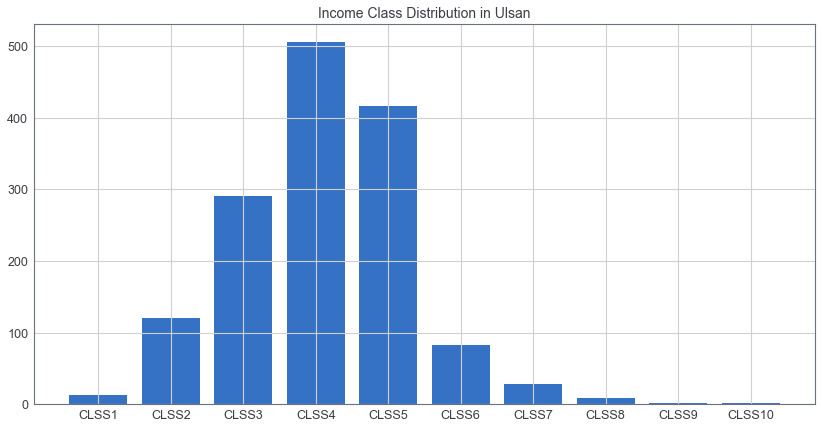

In [458]:
plt.figure(1, figsize=(14, 7))# control figure size
plt.bar(idx, num)
plt.title('Income Class Distribution in Ulsan', fontsize=14);
plt.show()

In [459]:
G = nx.Graph()

for idx,row in income_data.iterrows():
    G.add_node(row['Unnamed: 0'],Label=idx,latitude=row['latitude'], longitude=row['longitude'],
              income_class=row['CLSS'])

In [460]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1471
Number of edges: 0
Average degree:   0.0000


In [461]:
nx.write_gexf(G,'income_class.gexf')

In [462]:
income_data = income_data.sort_values(by = ['latitude','longitude'])
income_data.head()

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,HOUS,POP,CLSS,latitude,longitude
3270,263236,울산광역시,31,울주군,31710,73.02,201.72,3,35.380959,129.341694
6824,562545,울산광역시,31,울주군,31710,73.00,207.86,3,35.380995,129.338393
8850,722251,울산광역시,31,울주군,31710,189.02,520.88,4,35.383626,129.345041
6887,562608,울산광역시,31,울주군,31710,53.50,132.29,4,35.400474,129.288071
1392,113045,울산광역시,31,울주군,31710,112.00,283.73,4,35.401363,129.289186


In [463]:
final_data['CLSS'] = list(income_data['CLSS'])
final_data.head()

,PR_per_PY,latitude,longitude,SB_score,CLSS
466,1.879607e+06,35.380959,129.341694,29.796767,3
981,1.759531e+06,35.380995,129.338393,31.430960,3
894,2.439039e+06,35.383626,129.345041,78.290981,4
288,2.506893e+06,35.400474,129.288071,31.068409,4
295,2.483506e+06,35.401363,129.289186,61.772074,4


## Number of Worker Data

In [464]:
print(len(income_data), len(work_num_data))

1471 9170


Here are more data point than previous data set, we have to make the intersection by using the attribute longitude and latitude.

In [465]:
work_num_data = intersection_by_latlon(work_num_data, income_data)
print(len(work_num_data))
final_data = intersection_by_latlon(final_data, work_num_data)
print(len(final_data))

711
710


In [466]:
work_num_data.head()

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,POP,POP_10,POP_20,POP_30,POP_40,POP_50,POP_60,POP_70,POP_80_O,latitude,longitude
3869,181267,울산광역시,31,울주군,31710,39.72984,0.00000,5.53899,12.93659,18.49393,0.92011,1.84022,0.00000,0.0,35.380959,129.341694
4396,204286,울산광역시,31,울주군,31710,12.22789,0.00000,2.97435,4.29626,2.97435,1.32195,0.00000,0.66098,0.0,35.383626,129.345041
8436,388187,울산광역시,31,울주군,31710,3.32702,0.03502,0.77047,0.94557,1.33081,0.17511,0.07004,0.00000,0.0,35.401375,129.288085
3661,171922,울산광역시,31,울주군,31710,20.30753,0.17064,4.18526,6.54791,8.20925,0.85319,0.34128,0.00000,0.0,35.404102,129.285927
5849,268706,울산광역시,31,울주군,31710,11.22697,0.00000,1.18178,5.31804,4.72715,0.00000,0.00000,0.00000,0.0,35.404126,129.283725


In [467]:
# 중복 값 체크
len(work_num_data['latitude']) - len(set(work_num_data['latitude']))

1

There are one duplicated value

Searching for duplicated value

In [468]:
work_num_data.iloc[list(work_num_data.duplicated(['latitude'],keep='first'))]

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,POP,POP_10,POP_20,POP_30,POP_40,POP_50,POP_60,POP_70,POP_80_O,latitude,longitude
6657,305039,울산광역시,31,남구,31140,15.53334,0.0,3.58684,6.61707,2.11529,0.27588,2.93826,0.0,0.0,35.552191,129.26182


In [469]:
work_num_data.iloc[list(work_num_data.duplicated(['latitude'],keep='last'))]

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,POP,POP_10,POP_20,POP_30,POP_40,POP_50,POP_60,POP_70,POP_80_O,latitude,longitude
4646,215568,울산광역시,31,울주군,31710,13.82073,0.0,1.44348,8.04676,2.26835,2.06214,0.0,0.0,0.0,35.552191,129.26182


Drop one row, I arbitrary choose one (choose the small population one)

In [470]:
work_num_data = work_num_data.drop([4646])

Check the whole distribution

In [471]:
worker_dist = work_num_data.sum().iloc[6:-2]
worker_dist

POP_10      11.2011
POP_20      5566.72
POP_30      10635.2
POP_40      8383.18
POP_50      3264.08
POP_60      604.638
POP_70      65.5991
POP_80_O    19.4135
dtype: object

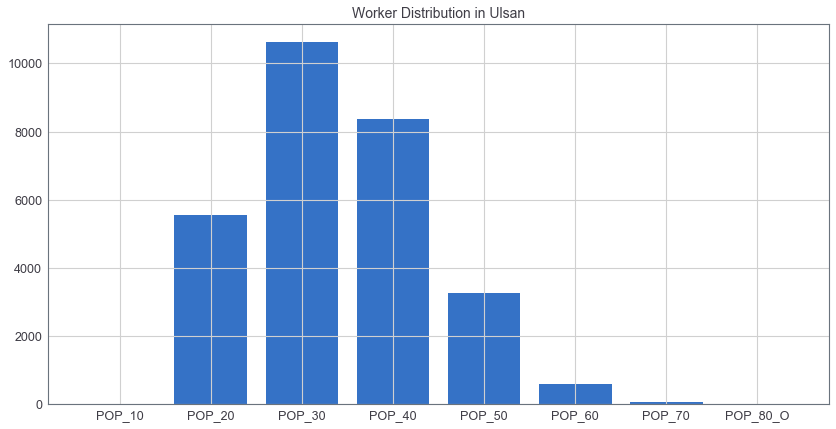

In [472]:
plt.figure(1, figsize=(14, 7))# control figure size
plt.bar(worker_dist.index, worker_dist)
plt.title('Worker Distribution in Ulsan', fontsize=14);
plt.show()

### Calculating 'Starbucks Score' by using the statistics by age

<img src="https://trello-attachments.s3.amazonaws.com/59103d52b56a24582f00dc97/5aea7895f31341c182f4ba3d/28262f31d81a759274e8d84f9008ffe8/image.png"></img>

In [473]:
weight = np.array([0.0093,0.3,0.42,0.22,0.045])

In [474]:
# construct the 'POP_50_Over' attribute
work_num_data['POP_50_O'] = work_num_data['POP_50'] + work_num_data['POP_60'] + work_num_data['POP_70'] + work_num_data['POP_80_O']

In [475]:
# Weighted average to get 'STARBUCKS SCORE'
work_num_data['SB_score'] = work_num_data[['POP_10', 'POP_20', 'POP_30', 'POP_40', 'POP_50_O']].apply(lambda x : np.matmul(x,weight), axis=1)

In [476]:
work_num_data['SB_score'].sort_values(ascending=False).head(10)

1130    392.306864
6452    200.761776
1497    153.827386
7664    136.096706
7807     95.447389
8304     94.060246
1664     92.151632
5909     88.265151
3749     83.859728
2605     80.758033
Name: SB_score, dtype: float64

In [477]:
G = nx.Graph()

for idx,row in work_num_data.iterrows():
    G.add_node(row['Unnamed: 0'],Label=idx,latitude=row['latitude'], longitude=row['longitude'],
              sb_worker_score=row['SB_score'])

In [478]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 710
Number of edges: 0
Average degree:   0.0000


In [479]:
nx.write_gexf(G,'worker_score.gexf')

In [480]:
len(work_num_data)

710

In [481]:
work_num_data.head()

,Unnamed: 0,MEGA_NM,MEGA_CD,CTY_NM,CTY_CD,POP,POP_10,POP_20,POP_30,POP_40,POP_50,POP_60,POP_70,POP_80_O,latitude,longitude,POP_50_O,SB_score
3869,181267,울산광역시,31,울주군,31710,39.72984,0.00000,5.53899,12.93659,18.49393,0.92011,1.84022,0.00000,0.0,35.380959,129.341694,2.76033,11.287944
4396,204286,울산광역시,31,울주군,31710,12.22789,0.00000,2.97435,4.29626,2.97435,1.32195,0.00000,0.66098,0.0,35.383626,129.345041,1.98293,3.440323
8436,388187,울산광역시,31,울주군,31710,3.32702,0.03502,0.77047,0.94557,1.33081,0.17511,0.07004,0.00000,0.0,35.401375,129.288085,0.24515,0.932416
3661,171922,울산광역시,31,울주군,31710,20.30753,0.17064,4.18526,6.54791,8.20925,0.85319,0.34128,0.00000,0.0,35.404102,129.285927,1.19447,5.867073
5849,268706,울산광역시,31,울주군,31710,11.22697,0.00000,1.18178,5.31804,4.72715,0.00000,0.00000,0.00000,0.0,35.404126,129.283725,0.00000,3.628084


In [483]:
final_data['SB_worker_score'] = list(work_num_data['SB_score'])
final_data

,PR_per_PY,latitude,longitude,SB_score,CLSS,SB_worker_score
466,1.879607e+06,35.380959,129.341694,29.796767,3,11.287944
894,2.439039e+06,35.383626,129.345041,78.290981,4,3.440323
321,2.319935e+06,35.401375,129.288085,106.704431,4,0.932416
738,3.380989e+06,35.404102,129.285927,61.260468,2,5.867073
706,2.211868e+06,35.404126,129.283725,64.346015,4,3.628084
888,3.271311e+06,35.404138,129.282624,46.157984,4,8.293141
155,3.263792e+06,35.404149,129.281523,40.445864,5,2.635290
1432,2.302905e+06,35.406853,129.281566,105.559989,4,15.690818
1246,2.448231e+06,35.406865,129.280465,150.039112,3,3.578586
407,2.831749e+06,35.409534,129.283811,38.161393,5,1.162007


In [485]:
final_data.to_csv('unlabled_final_data.csv')

In [4]:
data = pd.read_csv('unlabled_final_data.csv')
data = data[['latitude','longitude','SB_score','CLSS','SB_worker_score','PR_per_PY']]
data.head(10)

,latitude,longitude,SB_score,CLSS,SB_worker_score,PR_per_PY
0,35.380959,129.341694,29.796767,3,11.287944,1.879607e+06
1,35.383626,129.345041,78.290981,4,3.440323,2.439039e+06
2,35.401375,129.288085,106.704431,4,0.932416,2.319935e+06
3,35.404102,129.285927,61.260468,2,5.867073,3.380989e+06
4,35.404126,129.283725,64.346015,4,3.628084,2.211868e+06
5,35.404138,129.282624,46.157984,4,8.293141,3.271311e+06
6,35.404149,129.281523,40.445864,5,2.635290,3.263792e+06
7,35.406853,129.281566,105.559989,4,15.690818,2.302905e+06
8,35.406865,129.280465,150.039112,3,3.578586,2.448231e+06
9,35.409534,129.283811,38.161393,5,1.162007,2.831749e+06


In [11]:
node_data = pd.read_csv('Add_node_to_lane.csv')
node_data = node_data[['latitude','longitude','Lanes']]
node_data.head()

,latitude,longitude,Lanes
0,35.594499,129.347704,7.0
1,35.595572,129.347603,8.0
2,35.564435,129.327960,14.0
3,35.574493,129.338874,16.0
4,35.569200,129.331570,10.0
